In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, '0.0')

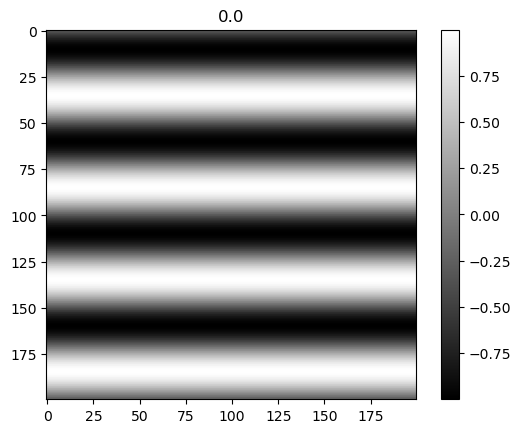

In [2]:
class Stripes(Dataset):
    def __init__(self, res, f, n_stripes):
        self.n_stripes = n_stripes
        self.res = res
        self.f = f
        
    def __len__(self):
        return self.n_stripes
    
    def __getitem__(self, idx):
        pix = np.linspace(0, 1, self.res)
        J, I = np.meshgrid(pix, pix)
        phase = np.random.rand()
        X = np.cos(2*np.pi*(self.f*I + phase))
        y = 0
        if np.random.rand() > 0.5:
            y = 1
            X = np.sign(X)
        X = np.array(X.flatten(), dtype=np.float32)
        return torch.from_numpy(X), torch.from_numpy(np.array(y, dtype=np.float32)), phase
    
res = 200
dataset = Stripes(res, 4, 1000)
X, y, p = dataset[0]
X = X.view((res, res))
plt.imshow(X, cmap='gray')
plt.colorbar()
plt.title("{}".format(y))

In [3]:
perceptron = nn.Linear(res*res, 1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(perceptron.parameters(), lr=1e-6)

n_epochs = 50
losses = []
accuracy = []
for epoch in range(n_epochs):
    loader = DataLoader(dataset, batch_size=50, shuffle=True)
    total_loss = 0
    total_correct = 0
    for (X, Y, p) in loader:
        optimizer.zero_grad()
        Y_est = perceptron(X).flatten()
        loss = loss_fn(Y_est, Y)
        loss.backward()
        optimizer.step()
        
        loss = loss.item()
        total_loss += loss
        Y_est = torch.round(torch.sigmoid(Y_est))
        total_correct += torch.sum(Y_est == Y)
    
    a = total_correct.cpu().detach()/len(dataset)
    losses.append(loss)
    accuracy.append(a)
    print(loss, a)

0.7395370602607727 tensor(0.4800)
0.7048369646072388 tensor(0.5070)
0.6885711550712585 tensor(0.5040)
0.693531334400177 tensor(0.4510)
0.6894069910049438 tensor(0.4880)
0.6921138167381287 tensor(0.5100)
0.6877753734588623 tensor(0.4870)
0.7019971609115601 tensor(0.4610)
0.6861692667007446 tensor(0.4790)
0.70081627368927 tensor(0.4780)
0.6960299015045166 tensor(0.4870)
0.6862643957138062 tensor(0.5100)
0.6783258318901062 tensor(0.4540)
0.7026420831680298 tensor(0.4710)
0.6883669495582581 tensor(0.5050)
0.6902409195899963 tensor(0.4890)
0.7060931324958801 tensor(0.4920)
0.7012209296226501 tensor(0.5200)
0.6944187879562378 tensor(0.5030)
0.705605685710907 tensor(0.5150)
0.6851109266281128 tensor(0.4970)
0.7039250731468201 tensor(0.4990)
0.6785493493080139 tensor(0.5060)
0.701961874961853 tensor(0.4710)
0.6909081339836121 tensor(0.5090)
0.686703085899353 tensor(0.4790)
0.6849472522735596 tensor(0.4320)
0.6965062022209167 tensor(0.5150)
0.7055449485778809 tensor(0.4920)
0.6991432905197144 t

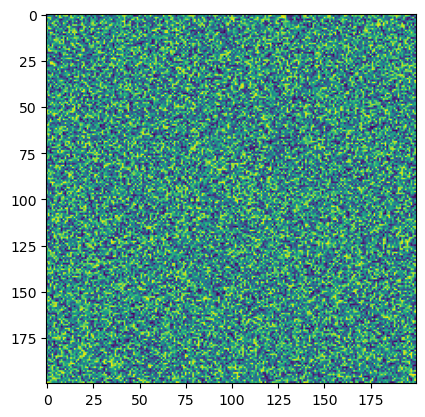

In [6]:
W = next(iter(perceptron.parameters()))
W = W.detach()
plt.imshow(W.reshape(res, res))

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ec72d50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1256f1b50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12686c050> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ebbe450> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124d9bdd0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ea7ee50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e726e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12415b050> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e5a89d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e41dad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11eb86e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e8cb890> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc126c1f010> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ea9dad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124b14a50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1241d6510> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ed65c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124b96e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11eb4e710> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc125961fd0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e80f010> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e71dad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e2d5c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e6d6e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1242c5fd0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124b550d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11fd26f90> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12433ee50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12433ef90> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ffbdc10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124baee50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc125af5190> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11eac6e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e8010d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e730a50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e465c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e2ea850> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e2e03d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e1cd350> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc126296e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12784db90> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12e435c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124badad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12687b710> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1266776d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11edb6e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124236e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1268807d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ea6dad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e31ee50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e75ef90> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e778d50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1956590029.py:23: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

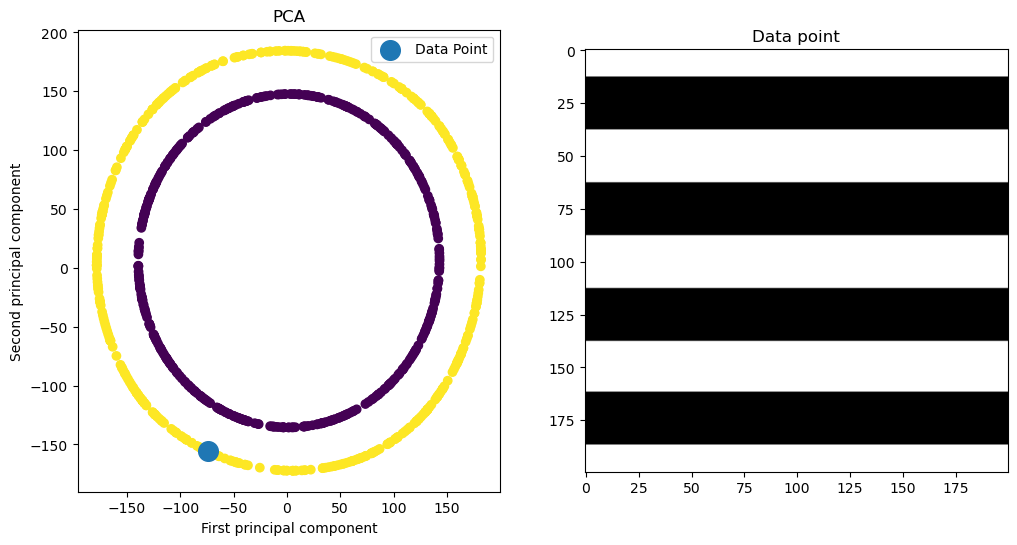

In [82]:
loader = DataLoader(dataset, batch_size=5000)
X, Y, P = next(iter(loader))
X = X.numpy()
Y = Y.numpy()
P = P.numpy()


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
XDR = pca.fit_transform(X)


idx = np.argsort(P)
plt.figure(figsize=(12, 6))
frame = 0
for i in idx:
    if Y[i] == 1:
        Xi = np.reshape(X[i, :], (res, res))
        plt.clf()
        plt.subplot(121)
        plt.scatter(XDR[:, 0], XDR[:, 1], c=Y)
        plt.scatter(XDR[i, 0], XDR[i, 1], s=200)
        plt.legend(["_", "Data Point"])
        plt.title("PCA")
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.subplot(122)
        plt.imshow(Xi, cmap='gray')
        plt.title("Data point")
        plt.savefig("Frame{}.png".format(frame))
        frame += 1

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12662dc10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11fc3bbd0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124ac4c50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e3b5c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e8adad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ec45c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e0c3710> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e075ad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1242df010> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124cb5ad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1267d5c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11fec5c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e157e10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11fcba950> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ed8cc50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11fcebad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc125ba41d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e0e5c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1262bee50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e2f5090> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1241d6e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11feab710> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc126935c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e55ee50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e576e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e123a90> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e37db50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1242c0950> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e288c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e8fe690> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124db4bd0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e2ca510> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e55dc10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e5c6e50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e69f010> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc125cf7010> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11fc488d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e6a5ad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124257850> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124105c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11ea627d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e8d3110> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12438db90> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e2975d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e59dad0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e89f850> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e075c10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc11e97a510> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc125cc1bd0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1263af050> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc1264a0a50> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc126936f90> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection obje

/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc124cd0a10> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])
/tmp/ipykernel_10709/1225633483.py:10: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7fc12434d310> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Data Point"])


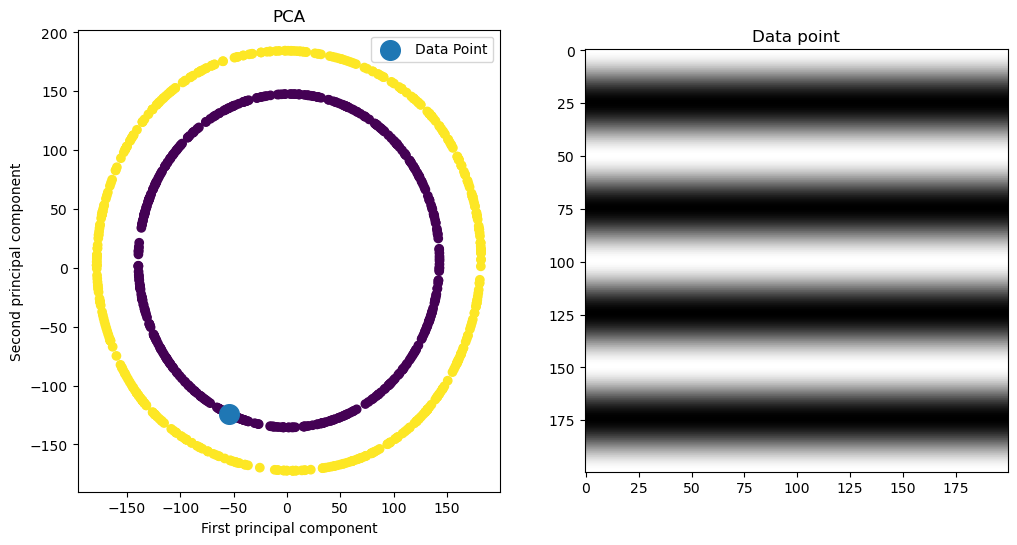

In [83]:
plt.figure(figsize=(12, 6))
frame = 0
for i in idx:
    if Y[i] == 0:
        Xi = np.reshape(X[i, :], (res, res))
        plt.clf()
        plt.subplot(121)
        plt.scatter(XDR[:, 0], XDR[:, 1], c=Y)
        plt.scatter(XDR[i, 0], XDR[i, 1], s=200)
        plt.legend(["_", "Data Point"])
        plt.title("PCA")
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.subplot(122)
        plt.imshow(Xi, cmap='gray')
        plt.title("Data point")
        plt.savefig("Frame{}.png".format(frame))
        frame += 1